# Neural Network Regression and Classification
A basic neural network model can be implemented by multi-layer perceptron (MLP), which is a supervised learning algorithm that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset where $\mathbf m$ is the number of dimensions for input and o is the number of dimensions for output. Given a set of features $X = x_1, x_2, \cdots, x_m$ and target $\mathbf y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hiden layers.

Here is a helpful link for reference: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

The advantages of multi-layer perceptron are:

1. Capability to learn non-linear models.

2. Capability to learn models in real-time.

The disadvantages of multi-layer perceptron include:

1. MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.

2. MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.

3. MLP is sensitive to feature scaling.

As a result, in this homework, we are going to explore the neural network regression and classification using scikit-learn package as well as PyTorch package.

## 1. Comparison of different function representations or models for regression

We will use the scikit-learn package. You will compare linear regression, kernel regression, and MLP regression. In order to do the regression, class MLPRegressor from scikit-learn will be used. The MLPRegressor implements a multi-layer perceptron that trains using backpropagation with no activation function in the output layer. Therefore, the square error is used as the loss function and the output is a set of continuous values. 

We will consider the task of learning the following complex function of two features x and y:
$$f(x, y) = \sin(a + bx + cy + dx^2 + ey^2 + fxy)$$



In [23]:
import numpy as np
def twoDSinFunction(x, y, coeffs):
    f = np.sin(coeffs[0] + coeffs[1]*x + coeffs[2]*y + coeffs[3]*x**2 + coeffs[4]*y**2 + coeffs[5]*x*y)
    return f

## Generate training data. 

We will assume that the data is localized to a circle $$x^2 + y^2 = 1.5^2$$ This will enable us to understand the impact of the manifold assumption, which assumes that real world data is localized to manifolds in higher dimensional spaces. We generate several sampling points on a circle with radius 1.5.


In [24]:
# Generate training data on the circle
theta = np.arange(0, 360, 0.05)
x = 1.5*np.sin(theta * np.pi / 180.).reshape(-1, 1)
y = 1.5*np.cos(theta * np.pi / 180.).reshape(-1, 1)

# Set up the coefficients
coeffs = [1,2,-3,1,-2,-1]

# Construct the X_train matrix by stacking x and y into a 720 * 2 matrix
# Construct y_train as the output of the created 2D sin function
X_train = np.hstack((x,y))
y_train = twoDSinFunction(x, y, coeffs)

## Fit a linear model to do linear regression using Scikit Learn

The model of the function used is 

$$f(x,y) = a_0 + a_1 x + a_2 y$$

In [25]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

regLinear = linear_model.Ridge(alpha=.1)
regLinear = regLinear.fit(X_train, y_train)



## TO DO: Modify the code below to do Gaussian kernel regression 

The RBF kernel ridge regression uses a Gaussian kernel with parameter gamma. Please play with the parameters to get the best fit. Note that RBF kernel approach amounts to interpolating/extrapolating the function using Gaussian kernel functions, centered at the training data points. 

In [26]:
from sklearn.kernel_ridge import KernelRidge

regKernel = linear_model.Ridge(alpha=.1)
regKernel = regKernel.fit(X_train, y_train)


## TO DO: Modify the code below to learn an MLP model from the data

The MLP model has several parameters including activation function, solver, learning rate, number of iteration, nesterovs_momentom. Please play with these parameters to get the best fit. Please turn on verbose to understand the training process and to see if the model is converging. You should also increase the hidden_layer_sizes from 10 and see the impact on the fits on training data and test data.



In [30]:
from sklearn.neural_network import MLPRegressor

# Set up the regression model
##############################################################################################################
# TODO: You need to change this linear ridge regressor to neural network (MLP) regressor and do the prediction
# and tune the paramaters to achieve a good prediction
##############################################################################################################
regMLP = MLPRegressor(hidden_layer_sizes=1000,verbose=False, activation = 'relu',solver = 'adam',batch_size='auto',learning_rate='constant',learning_rate_init=0.01,tol=0.00001,max_iter=100,momentum=0.9,validation_fraction=0.1,beta_1=0.9,beta_2=0.9,epsilon=1e-08)



#regMLP = linear_model.Ridge(alpha=.1)
regMLP = regMLP.fit(X_train, y_train)
print(regMLP)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.9, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=1000, learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=100, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=1e-05,
             validation_fraction=0.1, verbose=False, warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Compare the fits on training data

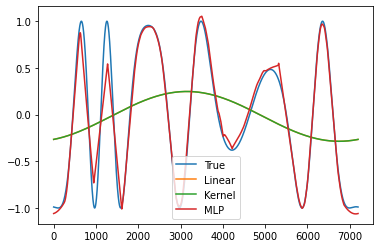

In [31]:

yMLPTrain = regMLP.predict(X_train)
yLinearTrain = regLinear.predict(X_train)
yKernelTrain = regKernel.predict(X_train)
yTrueTrain = twoDSinFunction(X_train[:,0],X_train[:,1],coeffs)
s = plt.figure()
s = plt.plot(yTrueTrain)
s = plt.plot(yLinearTrain)
s = plt.plot(yKernelTrain)
s = plt.plot(yMLPTrain)
s = plt.legend(('True','Linear','Kernel','MLP'),loc='lower center')

## Compare the fits on test data

To study the impact of the trained models on test data, we will generate uniform samples with values of $x$ and $y$ between -2 and 2. Note that the test data is arbitrary and does not match the training data. If a model is good, it is only guaranteed to work well when the test data matches the distribution of the training data (i.e, on or closer to the circle). 

Note that the models differ significantly on how they learn and extrapolate from the training data. 


<Figure size 432x288 with 0 Axes>

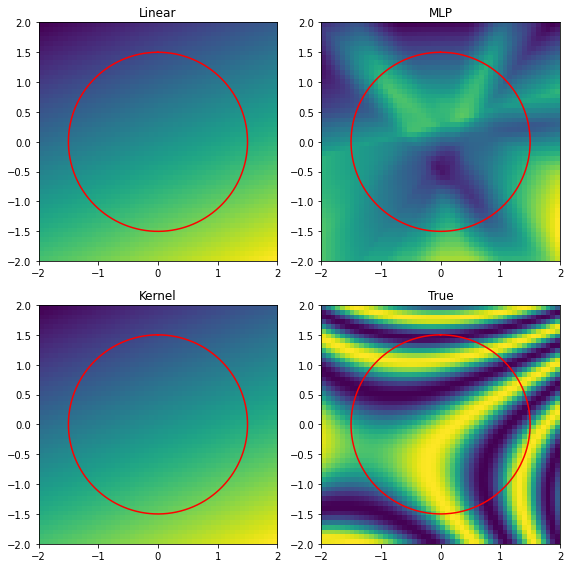

In [32]:
# Construct testing meshgrid
xtest = np.linspace(-2, 2, 50)
ytest = np.linspace(-2, 2, 50)
xtest, ytest = np.meshgrid(xtest, ytest)
Xtest = np.hstack((xtest.ravel().reshape(-1,1),ytest.ravel().reshape(-1,1)))

# Predict the meshgrid for all x and y values
yMLP = regMLP.predict(Xtest)
yMLP = np.reshape(yMLP,(50,50))

yLinear = regLinear.predict(Xtest)
yLinear = np.reshape(yLinear,(50,50))

yKernel = regKernel.predict(Xtest)
yKernel = np.reshape(yKernel,(50,50))

yTrue = twoDSinFunction(Xtest[:,0], Xtest[:,1], coeffs)
yTrue = np.reshape(yTrue,(50,50))

s = plt.figure()
fig, ax = plt.subplots(nrows=2,ncols=2, figsize = (8, 8))
s = ax[0,0].imshow(yLinear, extent=[-2,2,-2,2], origin='lower')
s = ax[0,0].plot(x, y, 'r')
s = ax[0,0].set_title('Linear')

s = ax[0,1].imshow(yMLP, extent=[-2,2,-2,2], origin='lower')
s = ax[0,1].plot(x, y, 'r')
s = ax[0,1].set_title('MLP')

s = ax[1,0].imshow(yKernel, extent=[-2,2,-2,2], origin='lower')
s = ax[1,0].plot(x, y, 'r')
s = ax[1,0].set_title('Kernel')

s = ax[1,1].imshow(yTrue, extent=[-2,2,-2,2], origin='lower')
s = ax[1,1].plot(x, y, 'r')
s = ax[1,1].set_title('True')

fig.tight_layout()